# Matching

## Problème

Dans le cadre de la gestion des employés au sein d’une entreprise, les managers sont confrontés à une décision cruciale : la sélection de paires d’employés, appelées “binômes”. Ce processus de sélection implique de prendre en compte la compatibilité de travail entre les employés, représentée par un graphe noté G, où chaque employé est un nœud distinct du graphe. La présence d’une arête entre deux nœuds, comme A et B, indique leur potentiel à travailler ensemble efficacement. L’objectif principal du manager est de créer le plus grand nombre possible de binômes.

## Etape 0: Imports

Imports of the libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time

Matplotlib is building the font cache; this may take a moment.


## Etape 1: Heuristique du Degré Maximum


In [2]:
def find_max_degree_matching(graph):
    temp_graph = graph.copy()
    matching_pairs = []

    while temp_graph.number_of_nodes() > 0:
        node_with_max_degree = max(temp_graph.nodes, key=temp_graph.degree)
        adjacent_nodes = list(temp_graph.neighbors(node_with_max_degree))

        if adjacent_nodes:
            chosen_neighbor = adjacent_nodes[0]
            matching_pairs.append((node_with_max_degree, chosen_neighbor))
            temp_graph.remove_node(node_with_max_degree)
            temp_graph.remove_node(chosen_neighbor)
        else:
            break

    return matching_pairs

**Heuristique du Degré Maximum :**

L’Heuristique du Degré Maximum vise à trouver un appariement de taille maximale dans un graphe en sélectionnant des nœuds en fonction de leur degré, c’est-à-dire du nombre d’arêtes connectées à un nœud. Le processus peut être décomposé comme suit :

1.	À chaque itération, l’algorithme sélectionne le nœud ayant le degré maximum. Cette opération de sélection a une complexité temporelle de $O(n)$, où “n” représente le nombre de nœuds dans le graphe.
2.	Une fois le nœud avec le degré maximum choisi, l’algorithme vérifie les voisins de ce nœud. Dans le pire des cas, un nœud peut avoir au maximum “n” voisins, ce qui signifie qu’il peut y avoir jusqu’à “n” itérations de vérification des voisins. L’opération de vérification des voisins et de sélection d’un voisin est une opération en $O(n)$.
3.	L’algorithme répète ce processus jusqu’à ce qu’il ne soit plus possible d’ajouter des nœuds à l’appariement. Le pire des cas se produit lorsque tous les nœuds sont inclus dans l’appariement. La complexité temporelle est de $O(n)$ pour chaque sélection de nœud et de $O(n)$ pour les vérifications des voisins, ce qui donne une complexité temporelle de $O(n^2)$ pour l’ensemble du processus.

Mathématiquement, la complexité temporelle dans le pire des cas pour l’Heuristique du Degré Maximum est $O(n^2)$.

## Etape 2: Heuristique du Poids Maximum

In [3]:
def find_maximum_weight_matching(graph):
    temp_graph = graph.copy()
    max_weight_matching = []

    sorted_edges = sorted(temp_graph.edges(data=True), key=lambda edge: -edge[2].get('weight', 1))

    for u, v, data in sorted_edges:
        if temp_graph.has_edge(u, v):
            max_weight_matching.append((u, v))
            temp_graph.remove_node(u)
            temp_graph.remove_node(v)

    return max_weight_matching

**Heuristique du Poids Maximum :**

L’Heuristique du Poids Maximum est conçue pour trouver un appariement de taille maximale dans un graphe en priorisant les arêtes en fonction de leur poids, lequel représente l’adéquation des nœuds connectés pour être appariés. Le processus peut être décomposé comme suit :

1.	À chaque itération, l’algorithme commence par trier les arêtes du graphe par leur poids. Cette opération de tri prend un temps de $O(m \log m)$, où “m” représente le nombre d’arêtes dans le graphe.
2.	Après le tri des arêtes, l’algorithme vérifie si l’arête sélectionnée peut être ajoutée à l’appariement. Cette vérification consiste essentiellement à vérifier si les nœuds connectés par l’arête sont toujours disponibles dans le graphe. Cette opération est généralement constante et se note $O(1)$.
3.	L’algorithme répète ce processus jusqu’à ce qu’aucune autre arête ne puisse être ajoutée à l’appariement. Dans le pire des cas, toutes les arêtes doivent être vérifiées, mais l’opération de tri domine la complexité temporelle.

La complexité temporelle de l’Heuristique du Poids Maximum est principalement déterminée par l’opération de tri, qui est de $O(m \log m)$. Cela signifie que le temps requis par l’algorithme pour trouver un appariement est proportionnel au logarithme du nombre d’arêtes dans le graphe.

## Etape 3: Comparaison des algorithmes


Pour ces tests, nous utilisons un graphe aléatoire Erdös-Rényi avec 120 nœuds et une probabilité de création d’arête de 0,04. Nous exécutons le couplage 1000 fois afin d’éviter l’aléa.

In [4]:
def evaluate_matching_performance(iterations, matching_function):
    execution_times = []
    matching_sizes = []
    average_matching_sizes = []

    for _ in range(iterations):
        random_graph = nx.erdos_renyi_graph(120, 0.04)

        start_time = time.time()
        matching = matching_function(random_graph.copy())
        end_time = time.time()
        execution_times.append(end_time - start_time)

        matching_sizes.append(len(matching))
        current_average_size = sum(matching_sizes) / len(matching_sizes)
        average_matching_sizes.append(current_average_size)

    return execution_times, average_matching_sizes

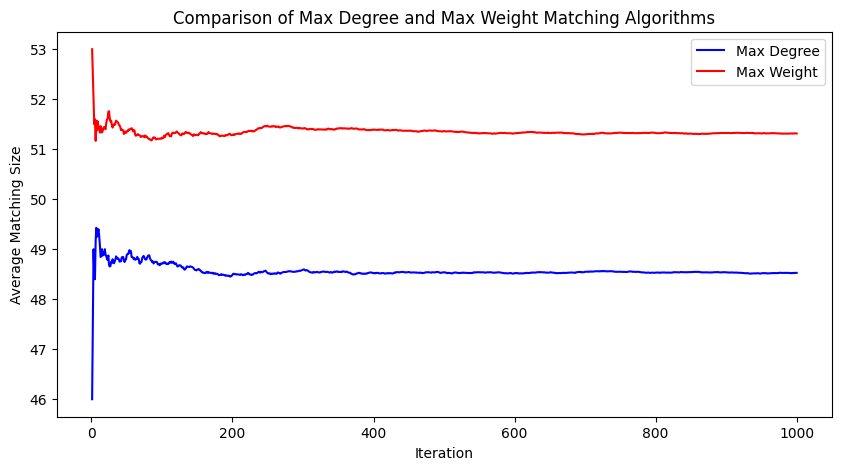

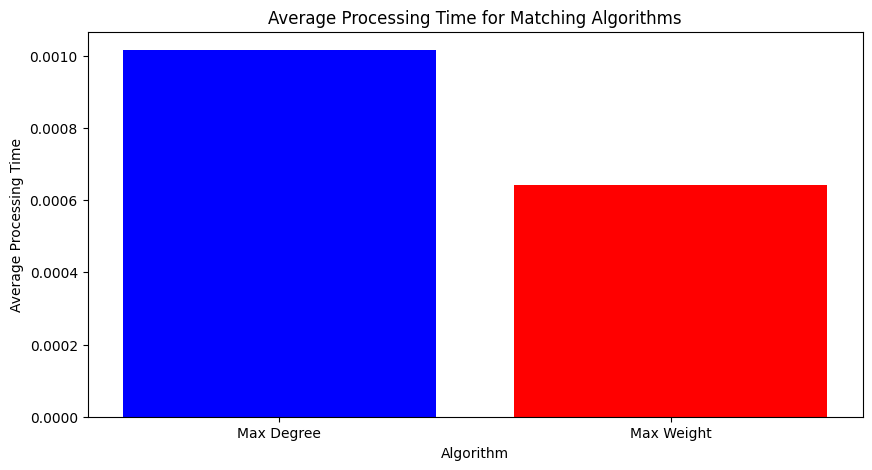

Average Max Degree Matching size over 1000 iterations: 48.527
Average Max Weight Matching size over 1000 iterations: 51.315

Average Max Degree Processing Time over 1000 iterations: 0.001015820264816284
Average Max Weight Processing Time over 1000 iterations: 0.0006428124904632568


In [7]:
def compare_matching_algorithms(num_iterations=100):
    # Obtenir les temps et les tailles moyennes des appariements pour les deux algorithmes
    degree_matching_times, degree_avg_sizes = evaluate_matching_performance(num_iterations, find_max_degree_matching)
    weight_matching_times, weight_avg_sizes = evaluate_matching_performance(num_iterations, find_maximum_weight_matching)

    iterations = range(1, len(degree_avg_sizes) + 1)

    # Graphique de la taille moyenne des appariements
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(iterations, degree_avg_sizes, label='Max Degree', color='blue')
    ax.plot(iterations, weight_avg_sizes, label='Max Weight', color='red')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Average Matching Size')
    ax.legend()
    plt.title('Comparison of Max Degree and Max Weight Matching Algorithms')
    plt.show()

    # Graphique du temps de traitement moyen
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(['Max Degree', 'Max Weight'], 
           [sum(degree_matching_times) / num_iterations, sum(weight_matching_times) / num_iterations], 
           color=['blue', 'red'])
    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Average Processing Time')
    plt.title('Average Processing Time for Matching Algorithms')
    plt.show()

    # Afficher les résultats des comparaisons
    print(f'Average Max Degree Matching size over {num_iterations} iterations: {degree_avg_sizes[-1]}')
    print(f'Average Max Weight Matching size over {num_iterations} iterations: {weight_avg_sizes[-1]}\n')

    print(f'Average Max Degree Processing Time over {num_iterations} iterations: {sum(degree_matching_times) / num_iterations}')
    print(f'Average Max Weight Processing Time over {num_iterations} iterations: {sum(weight_matching_times) / num_iterations}')

# Exemple d'utilisation
compare_matching_algorithms(1000)